# K-Nearest Neighbors for Regression

In this notebook we'll both implement some $k$-nearest neighbor regression models using scikit-learn, and think conceptually about what the $k$-nearest neighbors algorithm does.

In [ ]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

## A Single Quantitative Feature

Recall the K-Nearest Neighbors model for predicting quality (log(price)) from age for the wine data. In the reading, we created a plot of the 5-nearest neighbors regression function using the following code. (This code is all in the reading; I've just copied it here.)

In [ ]:
data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")

# Split the data into training and test sets.
bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_test = bordeaux_df.loc[1981:].copy()

# Log transform the target.
bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])
bordeaux_train.head()

X_train = bordeaux_train[["age"]]
y_train = bordeaux_train["log(price)"]

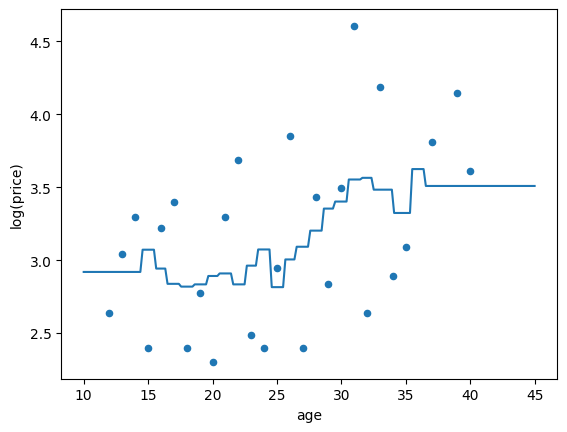

In [ ]:
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)

# Plot the predictions.
bordeaux_train.plot.scatter(x="age", y="log(price)")
y_new_.plot.line();

**This section contains some conceptual questions to think about and discuss with your partner.**

1\. Explain intuitively why the 5-nearest neighbors regression function has this shape.

2\. What would the 1-nearest neighbors regression function look like? Make a sketch and explain intuitively.

3\. What would the 27-nearest neighbors regression function look like? Make a sketch and explain intuitively. Hint: what is special about 27 in this example?

**Think about and discuss the previous questions first, then run the following code and discuss the output.**

4\. The following code plots the $k$-nearest neighbors regression function for predicting the quality (log(price)) of a wine from its age for $k=1, 5, 10, 20, 27$. How does the regression function change as $k$ increases?

In [ ]:
ks = [1, 5, 10, 20, 27]
colors = ["orange", "blue", "green", "magenta", "black"]

bordeaux_train.plot.scatter(x="age", y="log(price)")

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

for i in range(len(ks)):

  # Fit k-nearest neighbors
  model = KNeighborsRegressor(n_neighbors=ks[i])
  model.fit(X=X_train, y=y_train)

  # Make predictions at those feature values.
  y_new_ = pd.Series(
      model.predict(X_new),
      index=X_new["age"]
  )

  # Plot the predictions.
  y_new_.plot.line(color = colors[i])
  plt.legend(["values"] + ks);


## A Single Categorical Feature

Recall the Ames housing data set. We'll use a single categorical feature---Neighborhood---to predict SalePrice.

**Note:** some of the code from the "Categorical Features in Regression Models" notebook from Day 12 might be helpful. That notebook concerned linear regression, but you can just replace that with $k$-nearest neighbors.

In [ ]:
df_ames = pd.read_csv("http://dlsun.github.io/pods/data/AmesHousing.txt", sep = "\t")

df_ames

1\. Build a $10$-nearest neighbors model to predict house price using **Neighborhood** as the only feature.

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

2\. Use the model to predict the price for each neighborhood.

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

**This is a conceptual question to think about and discuss with your partner.**

3\. Compare the predicted prices to the mean price for each neighborhood. For what neighborhood is the predicted price equal to the neighborhood's mean price? Why? What is special about that neighborhood? Can you explain why the predicted prices don't match the mean price for the other neighborhoods?

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

## Housing data

1\. Fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**).

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

2\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood.

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

3\. Fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**.

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

4\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood. How does adding Neighborhood change the predictions?

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

5\. Use each of the models that you fit --- there should be two --- to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, 1 half bath in the NAmes neighborhood. Compare to the predicts you made for linear regression models (from Day 12).

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

6\. Consider a $k$-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**). (Same setup as in part 1 but with a general value of $k$ instead of 10). For $k=1, 2, \ldots, 100$ fit the $k$-nearest neighbors regression model and use it to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, 1 half bath in the NAmes neighborhood. Plot the predicted price versus $k$. How do the predictions change as $k$ increases? What would happen as $k$ gets larger and larger?

In [ ]:
# YOUR CODE HERE. ADD CELLS AS NEEDED